In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

# Day4~9 : 亮度、飽和度調整、冷暖系調整、顆粒感、對比度、模糊高光

## 讀取和顯示

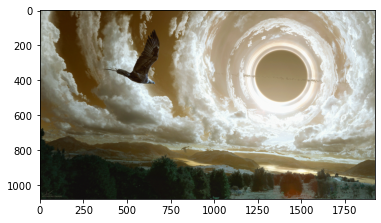

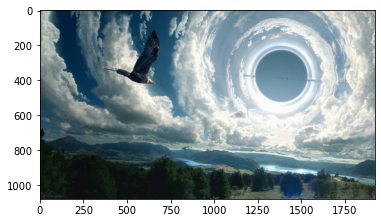

In [2]:
src = cv2.imread('C:\\Users\\USER\\Pictures\\Wallpaper\\thumb-1920-946628.png') #絕對路徑使用'\'，相對路徑使用'/'

#opencv格式為BGR，所以要轉成RGB顯示
rgbsrc = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.imshow(src)
plt.show()
plt.imshow(rgbsrc)

# 亮度調整

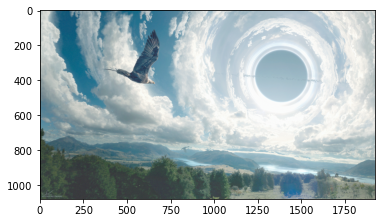

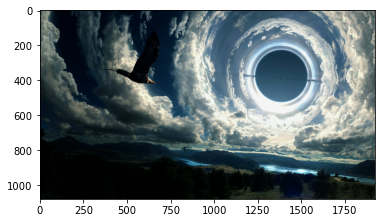

In [3]:
#利用公式進行亮度調整
org_img = src
maxIntensity = 255
phi = 1
theta = 1

#調高亮度
increase_img = (maxIntensity/phi)*(org_img/(maxIntensity/theta))**0.5
increase_img = np.array(increase_img, dtype=np.uint8)

increase_img = cv2.cvtColor(increase_img, cv2.COLOR_BGR2RGB)
plt.imshow(increase_img)
plt.show()

#調低亮度
decrease_img = (maxIntensity/phi)*(org_img/(maxIntensity/theta))**2
decrease_img = np.array(decrease_img, dtype=np.uint8)

decrease_img = cv2.cvtColor(decrease_img, cv2.COLOR_BGR2RGB)
plt.imshow(decrease_img)
plt.show()

# 飽和度調整

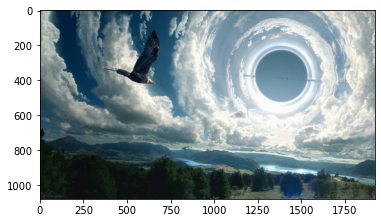

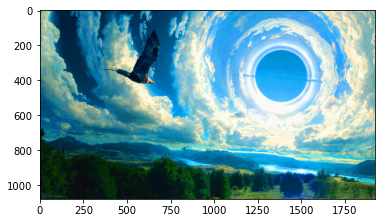

In [4]:
#將RGB轉換為HLS以進行飽和度調整
org_img = src

#進行歸一化(讓值介於0和1之間)
float_img = org_img.astype(np.float32)
float_img = float_img/255

#BGR to HLS
HLS_img = cv2.cvtColor(float_img, cv2.COLOR_BGR2HLS)
copy_HLS_img = np.copy(HLS_img) #copy:修改HLS_img內容並不會影響copy_HLS_img

lightness = 0 #亮度
saturation = 300 #飽和度

[x,y,z] = copy_HLS_img.shape
#亮度
copy_HLS_img[:, :, 1] = (1 + lightness / 100.0) * copy_HLS_img[:, :, 1]

for i in range(0, x):
    for j in range(0,y):
        if copy_HLS_img[i, j, 1]>1:
            copy_HLS_img[i, j, 1] = 1 #移除亮度大於1的數
            
#飽和度
copy_HLS_img[:, :, 2] = (1 + saturation / 100.0) * copy_HLS_img[:, :, 2]

for i in range(0, x):
    for j in range(0,y):
        if copy_HLS_img[i, j, 2]>1:
            copy_HLS_img[i, j, 2] = 1 #移除飽和度大於1的數
            

#HLS to BGR
rgb_img = cv2.cvtColor(copy_HLS_img, cv2.COLOR_HLS2BGR)
rgb_img = ((rgb_img * 255).astype(np.uint8))

org_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)
plt.imshow(org_img)
plt.show()
rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

# 冷暖色調調整

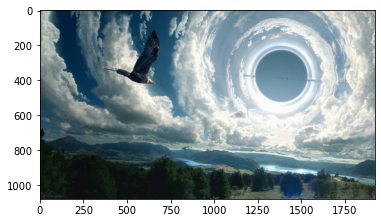

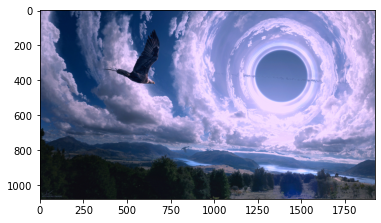

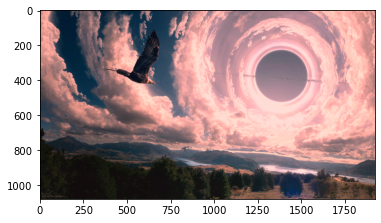

In [5]:
#分別取出B、G、R值分別做冷熱色調的調整
org_img = src
val = 50

imgB = org_img[:,:,0]
imgG = org_img[:,:,1]
imgR = org_img[:,:,2]

#冷色調
bAvg = cv2.mean(imgB)[0] #mean()[0]:取第0個通道的值 (因為輸出型態是1*4的矩陣)
gAvg = cv2.mean(imgG)[0]+val
rAvg = cv2.mean(imgR)[0]+val
avgGray = int(bAvg+gAvg+rAvg)/3 #float to int

#計算增益係數
b_coe = avgGray/bAvg
g_coe = avgGray/gAvg
r_coe = avgGray/rAvg
imgB = np.floor(imgB*b_coe)
imgG = np.floor(imgG*g_coe)
imgR = np.floor(imgR*r_coe)

#移除大於255的數值
[x,y,z] = org_img.shape
for i in range(0,x):
    for j in range(0,y):
        if imgB[i,j]>255:
            imgB[i,j]=255
        if imgR[i,j]>255:
            imgR[i,j]=255
        if imgG[i,j]>255:
            imgG[i,j]=255
            
cold_scr = np.dstack((imgB,imgG,imgR)).astype(np.uint8)


#------------------------暖色調------------------------------#
imgB = org_img[:,:,0]
imgG = org_img[:,:,1]
imgR = org_img[:,:,2]

#冷色調
bAvg = cv2.mean(imgB)[0]+val #mean()[0]:取第0個通道的值 (因為輸出型態是1*4的矩陣)
gAvg = cv2.mean(imgG)[0]+val
rAvg = cv2.mean(imgR)[0]
avgGray = int(bAvg+gAvg+rAvg)/3 #float to int

#計算增益係數
b_coe = avgGray/bAvg
g_coe = avgGray/gAvg
r_coe = avgGray/rAvg
imgB = imgB*b_coe
imgG = imgG*g_coe
imgR = imgR*r_coe

#移除大於255的數值
[x,y,z] = org_img.shape
for i in range(0,x):
    for j in range(0,y):
        if imgB[i,j]>255:
            imgB[i,j]=255
        if imgR[i,j]>255:
            imgR[i,j]=255
        if imgG[i,j]>255:
            imgG[i,j]=255
            
warm_scr = np.dstack((imgB,imgG,imgR)).astype(np.uint8) #dstack:將多個同維度的矩陣結合

##
org_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)
plt.imshow(org_img)
plt.show()
cold_scr = cv2.cvtColor(cold_scr, cv2.COLOR_BGR2RGB)
plt.imshow(cold_scr)
plt.show()
warm_scr = cv2.cvtColor(warm_scr, cv2.COLOR_BGR2RGB)
plt.imshow(warm_scr)
plt.show()

# 增加顆粒感

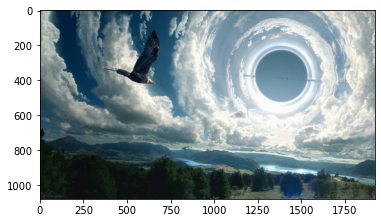

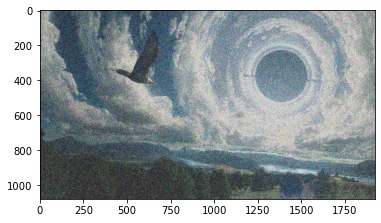

In [6]:
org_img = src

#歸一化
org_img = org_img/255

#隨機生成高斯雜訊(常態分布)
mean = 0 #平均
deviation = 0.5 #標準差
noise = np.random.normal(mean, deviation, org_img.shape)

guss_src = org_img + noise #原圖套上雜訊遮罩
guss_src = np.clip(guss_src, 0, 1) #np.cilp:限制矩陣中的數值介於0和1之間，>1:=1,<0:=0
guss_src = np.uint8(guss_src*255)

##
show_org_img = src
show_org_img = cv2.cvtColor(show_org_img, cv2.COLOR_BGR2RGB)
plt.imshow(show_org_img)
plt.show()
guss_src = cv2.cvtColor(guss_src, cv2.COLOR_BGR2RGB)
plt.imshow(guss_src)
plt.show()

# 對比度

contract:30


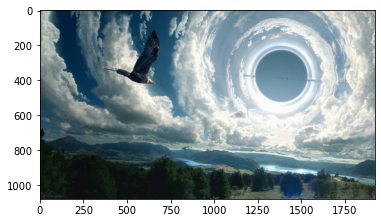

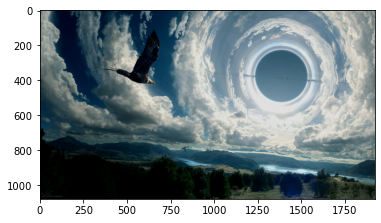

In [7]:
#利用公式計算出對比度
org_img = src

bright = 0
contract = input("contract:")
contract = int(contract)

B = bright/255
C = contract/255
k = math.tan((45+44*C)/180*math.pi) #math function

contract_img = (org_img-127.5*(1-B)*k+127.5*(1+B))
contract_img = np.clip(contract_img, 0, 255).astype(np.uint8) #np.cilp:限制矩陣中的數值介於0和1之間，>255:=255,<0:=0

##
org_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)
plt.imshow(org_img)
plt.show()
contract_img = cv2.cvtColor(contract_img, cv2.COLOR_BGR2RGB)
plt.imshow(contract_img)
plt.show()

# 模糊圖像高光部分

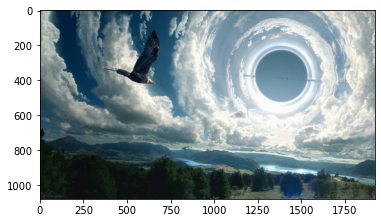

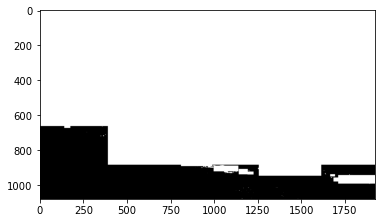

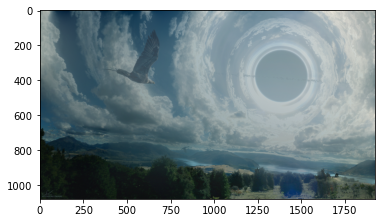

In [8]:
org_img = src
gray_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY) #轉灰階圖像
ret, thres_img = cv2.threshold(gray_img, 127, 255, 0) #利用threshold過濾出高光部分

counters,hierarchy = cv2.findContours(thres_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #找出含有高光的輪廓

#將list儲存的高光區域以座標位置儲存在圖像上
hi_img =  np.zeros(src.shape, dtype=np.uint8) 
for count in counters:
    x,y,w,h = cv2.boundingRect(count)
    hi_img[y:y+h,x:x+w] = 255
    mask = hi_img

#模糊高光
out_img = cv2.illuminationChange(org_img, mask, alpha=0.2, beta=0.2) 


##
org_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)
plt.imshow(org_img)
plt.show()
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask)
plt.show()
out_img = cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB)
plt.imshow(out_img)
plt.show()